<a href="https://colab.research.google.com/github/danielelbrecht/CAP5610-HW-2/blob/master/CAP5610_HW2_bestModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train best model on all train data, then evaluate on test data.  Base model performed best, adding one more dropout layer to reduce overfitting

In [0]:
from keras.datasets import cifar10
import numpy as np
import sklearn
import tensorflow as tf
from tensorflow.keras import layers, utils

In [0]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [0]:
# Preprocess data
train_images = train_images.reshape((50000, 32, 32, 3)) / 255.0
test_images = test_images.reshape((10000, 32, 32, 3)) / 255.0

train_labels_categorical = utils.to_categorical(train_labels, num_classes=10, dtype='float32')
test_labels_categorical = utils.to_categorical(test_labels, num_classes=10, dtype='float32')

In [6]:
#Define model

model = tf.keras.Sequential()

# First convolutional module
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

# Second convolutional module
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))


# Fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)  

In [8]:

# Train model
history = model.fit(train_images, 
                      train_labels_categorical, 
                      epochs=20,
                      validation_data=(test_images, test_labels_categorical))

Train on 50000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
50000/50000 [==============================] - 204s 4ms/sample - loss: 1.6180 - acc: 0.4120 - val_loss: 1.2455 - val_acc: 0.5508
Epoch 2/20
50000/50000 [==============================] - 203s 4ms/sample - loss: 1.2552 - acc: 0.5571 - val_loss: 1.1484 - val_acc: 0.6006
Epoch 3/20
50000/50000 [==============================] - 203s 4ms/sample - loss: 1.1328 - acc: 0.6045 - val_loss: 1.0116 - val_acc: 0.6538
Epoch 4/20
50000/50000 [==============================] - 203s 4ms/sample - loss: 1.0617 - acc: 0.6312 - val_loss: 0.9739 - val_acc: 0.6678
Epoch 5/20
50000/50000 [==============================] - 202s 4ms/sample - loss: 1.0107 - acc: 0.6543 - val_loss: 1.1106 - val_acc: 0.6185
Epoch 6/20
50000/50000 [==============================] - 203s 4ms/sample - loss: 0.9822 - acc: 0.6628 - val_loss: 1.0535 - val_acc: 0.6484
Epoch 7/20
50000/50000 [==============================] - 203s

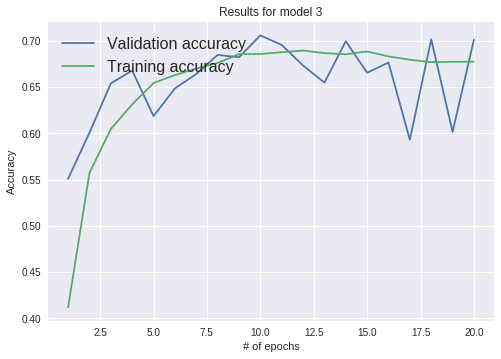

In [9]:
#plot results
import matplotlib as mpl
import matplotlib.pyplot as plt

epoch = []
for i in range(20):
  epoch.append(i+1)
  
plt.plot(epoch, history.history['val_acc'], label='Validation accuracy')
plt.plot(epoch, history.history['acc'], label='Training accuracy')
plt.xlabel("# of epochs")
plt.ylabel("Accuracy")
plt.title("Results for model 3")
plt.legend(loc="upper left", fontsize=16)
plt.show()